Get pair-wise correlations between binned condensability scores

In [1]:
# python modules
import random
import glob
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
# custom modules
import graphics_edit as graphics

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
# custom modules
import load_file_edit as load_file

In [5]:
path = "./data/"

In [6]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'E14':'mouse',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'E14':['chr%s' % (i) for i in range(1, 20)] + ['chrX', 'chrY'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

In [7]:
### set data information (fname/field) and key
path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/'

dinfo_dkey = {'E14_NCP_sp_1rep_1kb_score_table.gtab.gz':
              {'E14_NCP_sp_%d_1rep' % (i) :(1, 'E14', 'score', i) for i in range(1, 10)},
              'E14_NCP_sp_2rep_1kb_score_table.gtab.gz':
              {'E14_NCP_sp_%d_2rep' % (i) :(2, 'E14', 'score', i) for i in range(1, 10)}}
dinfo_dkey['E14_NCP_sp_1rep_1kb_score_table.gtab.gz']['ATcontent'] = 'ATcontent'

#dinfo_dkey = {'mCD8T:WT_NCP_sp_1rep_1kb_score_table.gtab.gz':
#              {'mCD8T:WT_NCP_sp_%d_1rep' % (i) :(1, 'mCD8T:WT', 'score', i) for i in range(1, 10)},
#              'mCD8T:WT_NCP_sp_2rep_1kb_score_table.gtab.gz':
#              {'mCD8T:WT_NCP_sp_%d_2rep' % (i) :(2, 'mCD8T:WT', 'score', i) for i in range(1, 10)}}
#dinfo_dkey['mCD8T:WT_NCP_sp_1rep_1kb_score_table.gtab.gz']['ATcontent'] = 'ATcontent'

In [8]:
### load gtab file
dkey_ID_value = {}
for fkey in dinfo_dkey:
    field_dkey = dinfo_dkey[fkey]
    for fname in glob.glob(path + '*'):
        if not re.match(fkey, fname.rsplit('/')[-1]):
            continue
        print "loading %s" % (fname.rsplit('/')[-1])
        field_ID_value = load_file.read_gtab(fname,
                                             field_choices=field_dkey.keys(),
                                             mode='col',
                                             skip_nan=True)
        for field, dkey in field_dkey.items():
            ID_value = field_ID_value[field]
            if dkey not in dkey_ID_value:
                dkey_ID_value[dkey] = {}
            dkey_ID_value[dkey].update(ID_value)

loading E14_NCP_sp_1rep_1kb_score_table.gtab.gz


loading E14_NCP_sp_2rep_1kb_score_table.gtab.gz


In [9]:
### get common IDs
ID_list = set([])
dkeys = dkey_ID_value.keys()
for i in range(len(dkeys)):
    dkey = dkeys[i]
    if i == 0:
        ID_list |= set(dkey_ID_value[dkey].keys())
        continue
    ID_list &= set(dkey_ID_value[dkey].keys())
ID_list = sorted(list(ID_list))
    

(1, 'E14', 'score', 1)
-0.09



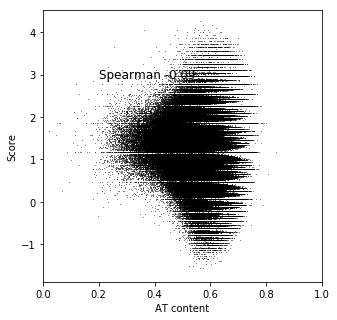

(1, 'E14', 'score', 2)
0.03



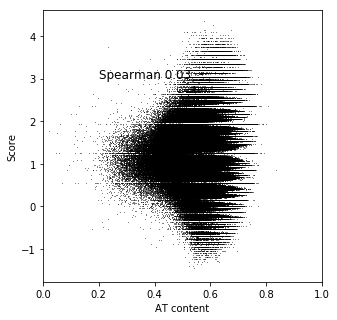

(1, 'E14', 'score', 3)
0.08



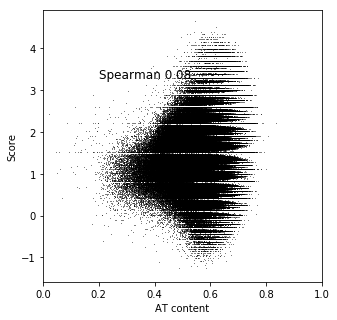

(1, 'E14', 'score', 4)
-0.05



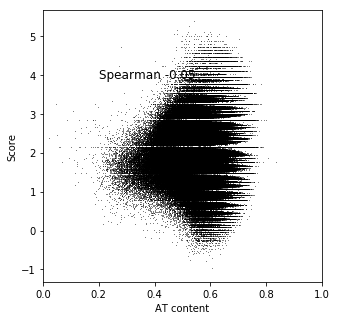

(1, 'E14', 'score', 5)
-0.14



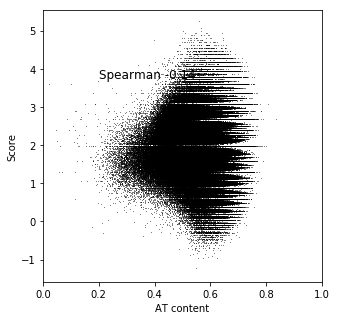

(1, 'E14', 'score', 6)
0.00



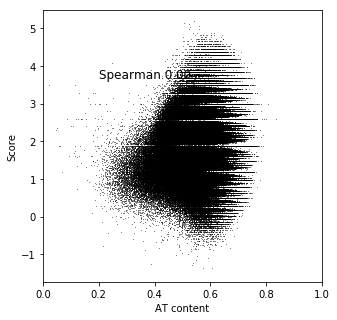

(1, 'E14', 'score', 7)
0.00



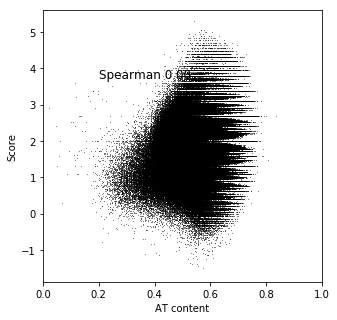

(1, 'E14', 'score', 8)
-0.06



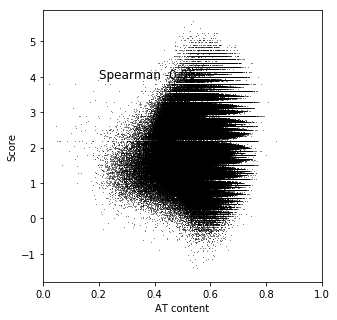

(1, 'E14', 'score', 9)
-0.42



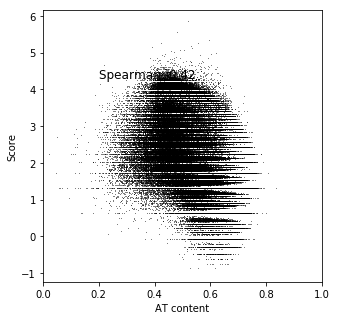

(2, 'E14', 'score', 1)
0.00



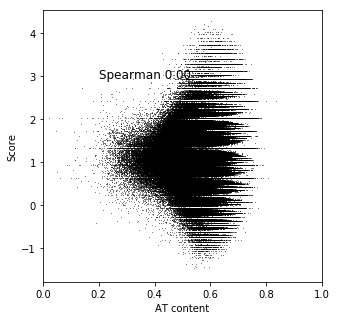

(2, 'E14', 'score', 2)
-0.09



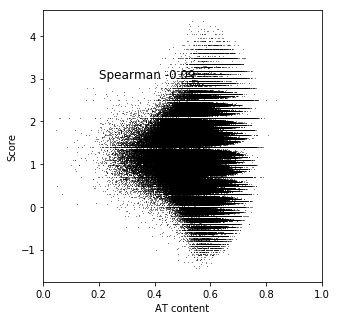

(2, 'E14', 'score', 3)
-0.10



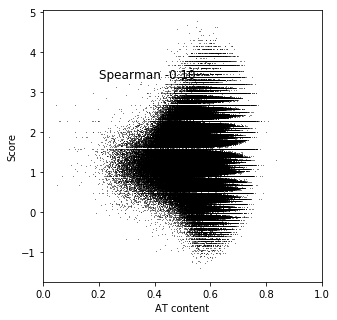

(2, 'E14', 'score', 4)
-0.16



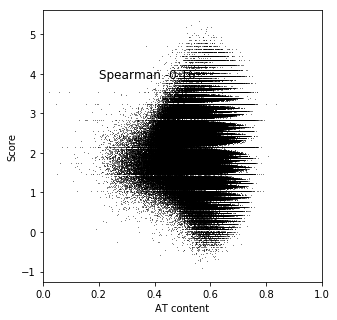

(2, 'E14', 'score', 5)
-0.21



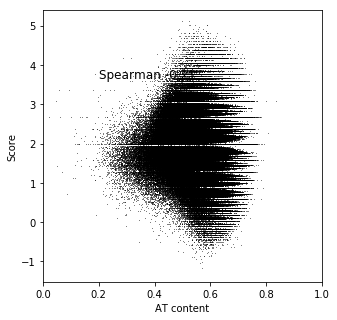

(2, 'E14', 'score', 6)
-0.15



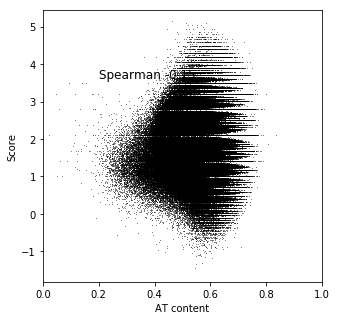

(2, 'E14', 'score', 7)
-0.11



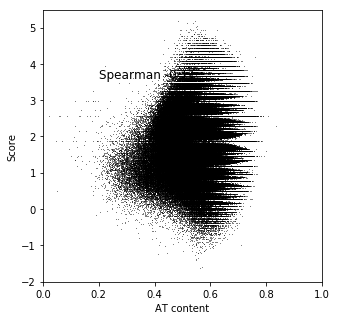

(2, 'E14', 'score', 8)
-0.12



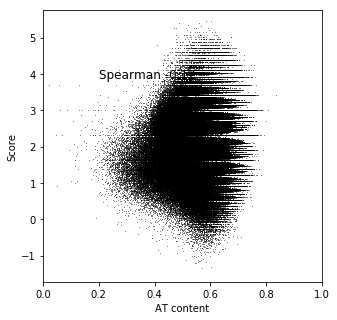

(2, 'E14', 'score', 9)
-0.47



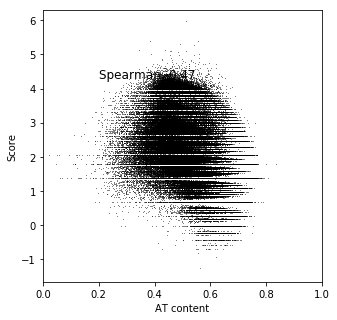

In [10]:
### get correlation over tittration points
for rep in [1, 2]:
    for i in range(1, 10):
        dkey = (rep, 'E14', 'score', i)
        
        X, Y = [], []
        for ID in ID_list:
            X.append(dkey_ID_value['ATcontent'][ID])
            Y.append(dkey_ID_value[dkey][ID])

        corr = scipy.stats.spearmanr(X, Y)[0]
        #corr = scipy.stats.pearsonr(X, Y)[0]
        #print "%d-%s-%s-%s-%d" % exp1
        #print "%d-%s-%s-%s-%d" % exp2
        print dkey
        #print dkey2
        print "%1.2f" % (corr)
        print 
        #print ("%s VS %s: %1.2f" % (agent1, agent2, corr))

        fig, ax = plt.subplots(figsize=(5, 5))
        plt.plot(X, Y, 'k,', alpha=0.5)

        #graphics.density_scatter (X,
        #                          Y,
        #                          ax=ax)

        plt.annotate("Spearman %1.2f" % (corr),
                     xy=(0.2, 0.75),
                     fontsize=12,
                     xycoords='axes fraction')

        #plt.title("%s VS %s" % (agent, agent2))
        #plt.xlabel("fold change (%d-%s-%s-%s-%d)" % exp1)
        #plt.ylabel("fold change (%d-%s-%s-%s-%d)" % exp2)
        #plt.xscale('log', base=2)
        #plt.yscale('log', base=2)

        plt.xlabel('AT content')
        plt.ylabel('Score')

        #plt.xlim([0,4])
        #plt.ylim([0,4])
        plt.xlim([0,1])
        plt.savefig('corr_%d.png' % (i), dpi=300)
        plt.show()
        plt.close()


    
    